In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:
salary = pd.read_csv("C:/Users/Atharv/Downloads/ERFOLG PYTHON LAB/Final/Final23_1_salary.csv")

In [3]:
salary.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [4]:
salary.shape

(3755, 11)

In [5]:
salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
salary.head().transpose()

,0,1,2,3,4
work_year,2023,2023,2023,2023,2023
experience_level,SE,MI,MI,SE,SE
employment_type,FT,CT,CT,FT,FT
job_title,Principal Data Scientist,ML Engineer,ML Engineer,Data Scientist,Data Scientist
salary,80000,30000,25500,175000,120000
salary_currency,EUR,USD,USD,USD,USD
salary_in_usd,85847,30000,25500,175000,120000
employee_residence,ES,US,US,CA,CA
remote_ratio,100,100,100,100,100
company_location,ES,US,US,CA,CA


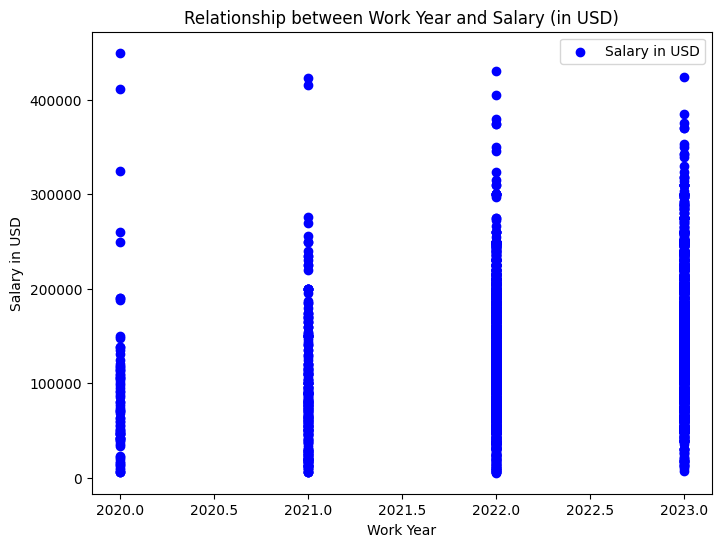

In [7]:
# Access the 'work_year' and 'salary_in_usd' columns and convert them to Python lists
work_years = salary['work_year'].tolist()
salary_usd = salary['salary_in_usd'].tolist()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(work_years, salary_usd, marker='o', color='b', label='Salary in USD')

# Add labels and title
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.title('Relationship between Work Year and Salary (in USD)')
plt.legend()

# Show the plot
plt.show()

In [8]:
# checking association between job_title type level and salary
crosstab1 = pd.crosstab(salary["job_title"], pd.qcut(salary["salary_in_usd"], q=3))
chi2_stat, p_value, _, _ = chi2_contingency(crosstab1)
print("Chi-square test statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square test statistic: 680.21786004067
P-value: 4.7144565270021184e-58


In [9]:
crosstab2 = pd.crosstab(salary["employee_residence"], pd.qcut(salary["salary_in_usd"], q=3))
chi2_stat, p_value, _, _ = chi2_contingency(crosstab2)
print("Chi-square test statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square test statistic: 1122.4043270186662
P-value: 9.855950527869751e-147


In [10]:
crosstab3 = pd.crosstab(salary["salary_currency"], pd.qcut(salary["salary_in_usd"], q=3))
chi2_stat, p_value, _, _ = chi2_contingency(crosstab3)
print("Chi-square test statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square test statistic: 920.679428965695
P-value: 1.6724606862873606e-168


In [11]:
crosstab4 = pd.crosstab(salary["experience_level"], pd.qcut(salary["salary_in_usd"], q=3))
chi2_stat, p_value, _, _ = chi2_contingency(crosstab4)
print("Chi-square test statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square test statistic: 759.646666402094
P-value: 8.039747169455548e-161


In [12]:
crosstab5 = pd.crosstab(salary["employment_type"], pd.qcut(salary["salary_in_usd"], q=3))
chi2_stat, p_value, _, _ = chi2_contingency(crosstab5)
print("Chi-square test statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square test statistic: 54.335135410519364
P-value: 6.313802433237384e-10


In [13]:
crosstab6 = pd.crosstab(salary["company_size"], pd.qcut(salary["salary_in_usd"], q=3))
chi2_stat, p_value, _, _ = chi2_contingency(crosstab6)
print("Chi-square test statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square test statistic: 205.72309211971253
P-value: 2.2092910300773363e-43


In [14]:
crosstab7 = pd.crosstab(salary["work_year"], pd.qcut(salary["salary_in_usd"], q=3))
chi2_stat, p_value, _, _ = chi2_contingency(crosstab7)
print("Chi-square test statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square test statistic: 217.2226530475076
P-value: 4.0683399537071827e-44


In [15]:
crosstab8 = pd.crosstab(salary["company_location"], pd.qcut(salary["salary_in_usd"], q=3))
chi2_stat, p_value, _, _ = chi2_contingency(crosstab8)
print("Chi-square test statistic:", chi2_stat)
print("P-value:", p_value)

Chi-square test statistic: 1046.071230063991
P-value: 1.3475765499499507e-137


In [16]:
# Define the columns to be encoded
columns_to_encode = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'salary_currency', 'experience_level', 'company_size', 'work_year']

# Separate the selected columns from the 'salary' DataFrame
data_to_encode = salary[columns_to_encode]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data to one-hot encode the categorical columns
encoded_data = encoder.fit_transform(data_to_encode)

# Get the column names after one-hot encoding
encoded_columns = encoder.get_feature_names_out(input_features=columns_to_encode)

# Convert the resulting sparse matrix to a DataFrame with the correct column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)

# Separate the non-categorical columns 
data_numerical = salary.drop(columns=columns_to_encode)

# Initialize the MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the non-categorical data to scale the numerical features
data_numerical_scaled = scaler.fit_transform(data_numerical)

# Convert the scaled numerical data to a DataFrame
data_numerical_scaled_df = pd.DataFrame(data_numerical_scaled, columns=data_numerical.columns)

# Concatenate the scaled numerical data and the encoded DataFrame to the original 'salary' DataFrame
salary_encoded = pd.concat([data_numerical_scaled_df, encoded_df], axis=1)

In [17]:
salary_encoded

,salary,salary_in_usd,remote_ratio,job_title_3D Computer Vision Researcher,job_title_AI Developer,job_title_AI Programmer,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Engineer,...,experience_level_EX,experience_level_MI,experience_level_SE,company_size_L,company_size_M,company_size_S,work_year_2020,work_year_2021,work_year_2022,work_year_2023
0,0.002435,0.181436,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000790,0.055900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.000642,0.045784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.005560,0.381839,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.003751,0.258207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,0.013358,0.914581,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3751,0.004771,0.327891,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3752,0.003257,0.224489,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3753,0.003093,0.213250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
X = salary_encoded.drop(columns=['salary_in_usd','salary'], axis=1)
Y = salary['salary_in_usd']

In [19]:
# Split the dataset into training (80%), validation (10%), and test (10%) sets

X_train, X_val_test, y_train, y_val_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [20]:
model = LinearRegression()

# Train the model on the training set
model.fit(X_train,y_train)

# Predict on the validation set
y_pred_val = model.predict(X_val)

# Calculate R2 score and RMSE on the validation set
val_r2 = r2_score(y_val, y_pred_val)
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)

# Predict on the testing set
y_pred_test = model.predict(X_test)

# Calculate R2 score and RMSE on the testing set
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Print the evaluation results
print("Validation Set:")
print("R2 Score:", val_r2)
print("RMSE:", val_rmse)
print()
print("Testing Set:")
print("R2 Score:", test_r2)
print("RMSE:", test_rmse)

Validation Set:
R2 Score: -8.07016260464229e+23
RMSE: 5.514916937988124e+16

Testing Set:
R2 Score: -5.344295225177302e+23
RMSE: 4.681211785297139e+16


In [21]:
# Create the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate R2 score and RMSE on the validation set
val_r2 = r2_score(y_val, y_pred_val)
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)

# Predict on the testing set
y_pred_test = rf_model.predict(X_test)

# Calculate R2 score and RMSE on the testing set
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Print the evaluation results
print("Validation Set:")
print("R2 Score:", val_r2)
print("RMSE:", val_rmse)
print()
print("Testing Set:")
print("R2 Score:", test_r2)
print("RMSE:", test_rmse)

Validation Set:
R2 Score: 0.44240636275877476
RMSE: 45841.28021927755

Testing Set:
R2 Score: 0.36091820862330715
RMSE: 51190.72626641306
